# TITANIC SURVIVAL PREDICTION

#### Reading the CSV file for the Task, using the pandas library

In [36]:
import pandas as pd
data = pd.read_csv('C:/Users/faizr/Interns/DS@CodSoft/Task -1/archive_10/tested.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Examing the info of the data, to get know about the data in depth, it will us to see, how many values are missing and what are the dtypes
You can see that, there are some values that are missing in the data and the dtpyes aren't all the same, it's a part of cleaning the data

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


As we already know that there are missing values but we don't know the exact no. of missing valules, so here we're using the isna() to see the all missing values and after it we used the sum() to sum all the values

In [3]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

let's see the missing values graphcally, using the ployly.graph_objects

In [42]:
import plotly.graph_objects as go
missing_values = data.isnull().sum()

fig = go.Figure(
    data=[go.Bar(x=missing_values.index, y=missing_values.values)],
    layout_title_text = 'Missing Values in Graph View'
)

fig.show()

### Analysing the target

In [43]:
data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

Now we are here, replacing the values with the numerical as the model want the numerical values instead of categorical data

In [44]:
gender_maping = {'male': 0, 'female': 1}
data['Sex'] = data['Sex'].map(gender_maping)

In [45]:
data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [46]:
embarked_maping = {'S': 1, 'C': 0, 'Q': -1}
data['Embarked'] = data['Embarked'].map(embarked_maping)

In [47]:
data['Cabin'] = data['Cabin'].fillna('No Cabin')

In [48]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [49]:
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

look now we don't have any missing values

In [50]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

we don't have any missing values but the dtype of the columns are still not in numerical, which we don't want to feed  out model

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    int64  
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Cabin        418 non-null    object 
 11  Embarked     418 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 39.3+ KB


converting the ticket into numerical

In [53]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
np.random.seed(1)

encoder = LabelEncoder()
ticket_encoded = data['Ticket']
data['Ticket'] = encoder.fit_transform(ticket_encoded)

In [54]:
np.random.seed(1)
cabin_encoded = data['Cabin']
data['Cabin'] = encoder.fit_transform(cabin_encoded)

In [55]:
data.info()   #see we don't have any onject form, all are the numerical form

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    int64  
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    int32  
 9   Fare         418 non-null    float64
 10  Cabin        418 non-null    int32  
 11  Embarked     418 non-null    int64  
dtypes: float64(2), int32(2), int64(7), object(1)
memory usage: 36.1+ KB


### correlation
finding the correlation, so we can find the most depending features on our target

In [59]:
num = data.select_dtypes(include = ['float64', 'int64', 'int32', 'float32'])
corr_num = num.corr()['Survived'][:-1]
q25, q50, q75 = np.percentile(corr_num, [25,50,75])
print('q25: ', q25, "q50: ", q50, "q75: ", q75)
sort_corr_num = corr_num.sort_values(ascending = False)
top_features = sort_corr_num[sort_corr_num > q25].to_frame()
top_features_indicies = top_features.index
top_features_indicies
good_data = data[top_features_indicies]
good_data

q25:  -0.017436706167042397 q50:  0.07380319094309741 q75:  0.18331688744011093


,Survived,Sex,Fare,Parch,SibSp,Ticket,Age
0,0,0,7.8292,0,0,152,34.50000
1,1,1,7.0000,0,1,221,47.00000
2,0,0,9.6875,0,0,73,62.00000
3,0,0,8.6625,0,0,147,27.00000
4,1,1,12.2875,1,1,138,22.00000
...,...,...,...,...,...,...,...
413,0,0,8.0500,0,0,267,30.27259
414,1,1,108.9000,0,0,324,39.00000
415,0,0,7.2500,0,0,346,38.50000
416,0,0,8.0500,0,0,220,30.27259


In [61]:
good_data.drop('Name', axis = 1, inplace = True)

KeyError: "['Name'] not found in axis"

In [62]:
good_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Fare      418 non-null    float64
 3   Parch     418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Ticket    418 non-null    int32  
 6   Age       418 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 21.4 KB


### splitting the data into features and target

In [63]:
x = good_data.drop('Survived', axis = 1)
y = good_data['Survived']

### splitting the data features and target into train and test

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [65]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 100000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=100000)

In [66]:
model.score(x_train, y_train)

1.0

In [67]:
model.score(x_test, y_test)

1.0

In [68]:
y_perdict = model.predict(x_test)

<Axes: >

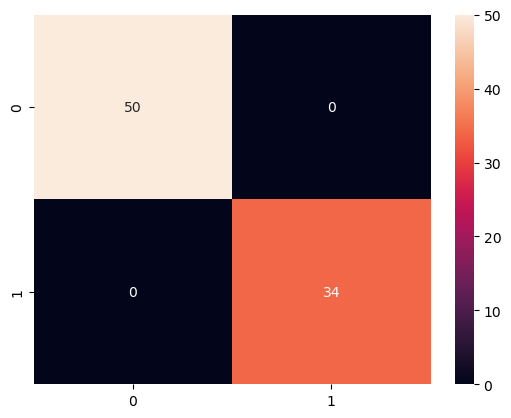

In [69]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
conmat = confusion_matrix(y_test, y_perdict)
import seaborn as sns
sns.heatmap(conmat, annot=True)

In [31]:
print(classification_report(y_test, y_perdict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



# Deployment side

In [74]:
good_data.head(1) #so we just have to insert 6 values(features) to predict the output

,Survived,Sex,Fare,Parch,SibSp,Ticket,Age
0,0,0,7.8292,0,0,152,34.5


In [77]:
dataa = pd.read_csv('C:/Users/faizr/Interns/DS@CodSoft/Task -1/archive_10/tested.csv')
dataa.tail(1)  # to the the origical values 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [88]:
import warnings
from sklearn.exceptions import DataConversionWarning

# Filter out the specific warning
warnings.filterwarnings("ignore", category=DataConversionWarning)

# Sex = input("Enter the sex: ")
# Age = input("Enter the age of the passenger: ")
# SibSp = input("Enter the SibSp of the passenger: ")
# Parch = input("Enter the Parch of the passenger: ")
# Ticket = input("Enter the Ticket of the passenger: ")
# Fare = input("Enter the Fare of the passenger: ")

Sex = 'male'
Age = 34.5
SibSp = 0
Parch = 0
Ticket = '330911'
Fare = 7.8292

df = pd.DataFrame([[Sex, Fare, Parch, SibSp, Ticket, Age]],
                 columns = ['Sex', 'Fare', 'Parch', 'SibSp', 'Ticket', 'Age'])

#we'll do the same preprocessing process that we did in during traing the model
gender_maping = {'male': 0, 'female': 1}
df['Sex'] = df['Sex'].map(gender_maping)

np.random.seed(1)

ticket_encoded = df['Ticket']
df['Ticket'] = encoder.fit_transform(ticket_encoded)

prediction = model.predict(df).tolist()

if prediction[0] == 0:
    print("Couldn't survived")
elif prediction[0] == 1:
    print("Survived")
else:
    print("Error")

Couldn't survived


# Support 🤗